# Импортируем библиотеки

In [433]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [434]:
plt.style.use('ggplot')
pd.set_option('display.float_format', '{:.2f}'.format)

# Скачиваем датасет

In [435]:
df = pd.read_csv('../data/_data.csv', index_col=0)
df.sample(2)

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
13352,273385654,1,Квартира,м. Петровский Парк (8 мин пешком),"Москва, улица Верхняя Масловка, 16",46.0/17.0/10.0,"10/16, Панельный",наземная,"75000.0 руб./ За месяц, Залог - 75000 руб., Ко...",+79155953909,Сдается в аренду впервые после капитального ре...,Дизайнерский,NaN,Лоджия (2),Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Душевая ка...",NaN,NaN,2.70,Пасс (2),Да,https://www.cian.ru/rent/flat/273385654
18006,273691707,"2, Изолированная",Квартира,м. Волгоградский проспект (None мин пешком),"Москва, улица Мельникова, 3к3",60.0/35.0/15.0,"9/18, Монолитно-кирпичный",подземная,"80000.0 руб./ За месяц, Залог - 80000 руб., Ко...",+79651916640,Объект 539220. Внимание! \nСМОТРИТЕ ВИДЕО! \n...,Евроремонт,20-15,Лоджия (1),Во двор,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...","На ул. Мельникова, 2016",NaN,3.00,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273691707


In [436]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df['Санузел'].value_counts()

Санузел
Совмещенный (1)                    10078
Раздельный (1)                      7158
Совмещенный (2)                     1437
Совмещенный (1), Раздельный (1)      812
Раздельный (2)                       534
Совмещенный (3)                      241
Совмещенный (2), Раздельный (1)      188
Совмещенный (4)                       77
Раздельный (3)                        52
Совмещенный (1), Раздельный (2)       30
Совмещенный (3), Раздельный (1)       27
Совмещенный (2), Раздельный (2)       25
Раздельный (4)                        15
Совмещенный (3), Раздельный (3)        6
Совмещенный (4), Раздельный (1)        6
Совмещенный (4), Раздельный (2)        4
Совмещенный (2), Раздельный (3)        2
Совмещенный (1), Раздельный (3)        2
Совмещенный (2), Раздельный (4)        1
Совмещенный (3), Раздельный (2)        1
Name: count, dtype: int64

In [437]:
df.isna().sum()

ID  объявления                  0
Количество комнат            1041
Тип                             0
Метро                        1315
Адрес                           0
Площадь, м2                     0
Дом                             0
Парковка                    13417
Цена                            0
Телефоны                        0
Описание                        0
Ремонт                       2755
Площадь комнат, м2           8910
Балкон                       7978
Окна                         6613
Санузел                      2672
Можно с детьми/животными     6096
Дополнительно                 357
Название ЖК                 17520
Серия дома                  21205
Высота потолков, м          12162
Лифт                         5500
Мусоропровод                10522
Ссылка на объявление            0
dtype: int64

In [438]:
df.shape

(23368, 24)

In [439]:
df_moscow = df[df['Адрес'].str.contains('Москва', case=False, na=False)]
df_moscow.shape

(19737, 24)

In [440]:
df0 = df.copy()

In [441]:

df0['price'] = pd.to_numeric(df0['Цена'].str.extract(r'(\d+)')[0],  errors='coerce')
df0['total_area'] = pd.to_numeric(df0['Площадь, м2'].str.extract(r'(\d+)')[0], errors='coerce')

df0.head()

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,price,total_area
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,500000,200
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,500000,198
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,500000,200
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456,400000,170
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615,225000,58


In [442]:
df0['metro_min'] = pd.to_numeric(df0['Метро'].str.extract(r'\((\d+)')[0], errors='coerce')
df0.sample(10)

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,price,total_area,metro_min
5876,272190436,"2, Изолированная",Квартира,м. Царицыно (12 мин пешком),"Москва, Бакинская улица, 10",52.4/35.0/12.0,"10/16, Панельный",NaN,"50000.0 руб./ За месяц, Залог - 25000 руб., Ко...","+79096369930, +79096468630",2х комнатная квартира сдается на длительный с...,Косметический,20-15,Лоджия (1),На улицу и двор,Раздельный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.64,Пасс (2),Да,https://www.cian.ru/rent/flat/272190436,50000,52,12.00
3340,266169524,4,Квартира,м. Павелецкая (7 мин пешком),"Москва, улица Бахрушина, 19С2",190.0/105.0/16.0,"4/8, Монолитно-кирпичный",подземная,"280000.0 руб./ За месяц, Залог - 280000 руб., ...",+79852432860,Лот 109785. Татьяна Лучкина.\n\nБонус агенту 5...,Косметический,48 20 19 18,Лоджия (1),На улицу и двор,"Совмещенный (2), Раздельный (1)","Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.00,Пасс (1),Да,https://www.cian.ru/rent/flat/266169524,280000,190,7.00
17904,209358890,"2, Изолированная",Квартира,м. Дубровка (5 мин пешком),"Москва, улица 1-я Машиностроения, 10",49.3/27.7/11.8,"15/30, Монолитный",подземная,"110000.0 руб./ За месяц, Залог - 110000 руб., ...",+79851608521,БЕЗ КОМИССИИ! \nКвартира расположена в одном и...,Дизайнерский,"16,8-10,9",Балкон (1),Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Душевая ка...","Дубровская Слобода, 2012",NaN,3.00,"Пасс (2), Груз (1)",Нет,https://www.cian.ru/rent/flat/209358890,110000,49,5.00
11056,273551103,1,Квартира,м. Бутово (10 мин пешком),"Москва, Изюмская улица, 43к3, ш. Калужское (12...",36.0/16.0/10.0,"5/15, Панельный",NaN,"35000.0 руб./ За месяц, Залог - 35000 руб., Ко...",+79660593471,Современная квартира. Полностью меблирована и ...,Дизайнерский,16,Лоджия (1),Во двор,Раздельный (1),NaN,"Мебель в комнатах, Мебель на кухне, Холодильни...",NaN,NaN,NaN,Пасс (2),Да,https://www.cian.ru/rent/flat/273551103,35000,36,10.00
11932,273688481,2,Квартира,м. Фили (15 мин пешком),"Москва, Береговой проезд, 5к2",52.0/40.0/7.0,"2/21, Монолитно-кирпичный",NaN,"60000.0 руб./ За месяц, Залог - 60000 руб., Ко...","+79623606881, +79057189619",ЛОТ 13549. Предлагается в аренду просторная ев...,Евроремонт,20-20,NaN,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Фили Град,NaN,NaN,"Пасс (2), Груз (2)",NaN,https://www.cian.ru/rent/flat/273688481,60000,52,15.00
10384,203334157,1,Квартира,м. Лухмановская (13 мин пешком),"Москва, улица Рудневка, 43",40.0/20.0/9.0,"5/14, Панельный",NaN,"25000.0 руб./ За месяц, Залог - 25000 руб., Ко...",+79670294874,"Сдается на 6 мес!!! Уютная квартира, вся необ...",Косметический,20,Балкон (1),NaN,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,NaN,Пасс (2),Да,https://www.cian.ru/rent/flat/203334157,25000,40,13.00
19964,267499156,1,Квартира,м. Приморская (20 мин пешком),"Санкт-Петербург, Уральская улица, 21",33.0/9.0/15.0,2/12,открытая,"38000.0 руб./ За месяц, Сумма коммунальных пла...",+79819903623,Предлагается в аренду отличная однокомнатная к...,Евроремонт,NaN,Лоджия (1),NaN,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Стиральная...",Эмеральд на Малой Неве,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/267499156,38000,33,20.00
15858,267289619,4,Квартира,м. Крылатское (10 мин пешком),"Москва, улица Крылатские Холмы, 33К3",176.0/90.0/15.0,"4/22, Монолитный",подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",+79197646184,Лот 104911. Вера Бархатова.\n\nБонус агенту 20...,Косметический,20 25 30 15,Лоджия (1),На улицу и двор,Совмещенный (2),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",К

ValueError: Transform function failed

In [386]:
df0['rooms'] = pd.to_numeric(df0['Количество комнат'].str.extract(r'(\d+)')[0], errors='coerce')

In [387]:
df0['price'].describe().to_frame()

,price
count,23368.00
mean,82894.14
std,122696.20
min,5000.00
25%,37000.00
50%,49500.00
75%,75000.00
max,3000000.00


In [375]:
df0['price'].describe()

count    2.336800e+04
mean     8.289414e+04
std      1.226962e+05
min      5.000000e+03
25%      3.700000e+04
50%      4.950000e+04
75%      7.500000e+04
max      3.000000e+06
Name: price, dtype: float64

In [361]:
df0.drop(columns=['Тип', 'Ссылка на объявление', 'Телефоны', 'Цена', 'Площадь, м2', 'Количество комнат', 'Метро'], inplace=True)

df0.columns

Index(['ID  объявления', 'Адрес', 'Дом', 'Парковка', 'Описание', 'Ремонт',
       'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод', 'price',
       'total_area', 'metro_min', 'rooms'],
      dtype='object')

<Axes: xlabel='price', ylabel='Count'>

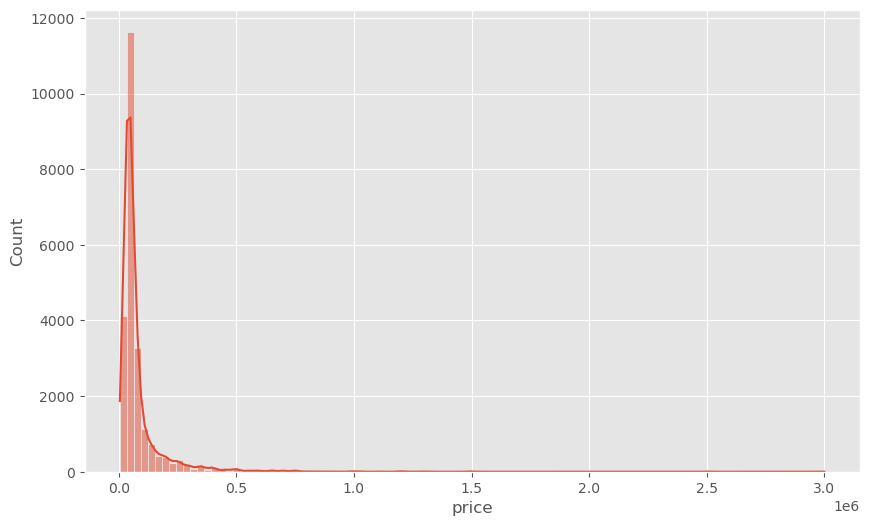

In [324]:
plt.figure(figsize=(10, 6))
sns.histplot(df0['price'], bins=100, kde=True) 

<Axes: xlabel='total_area', ylabel='Count'>

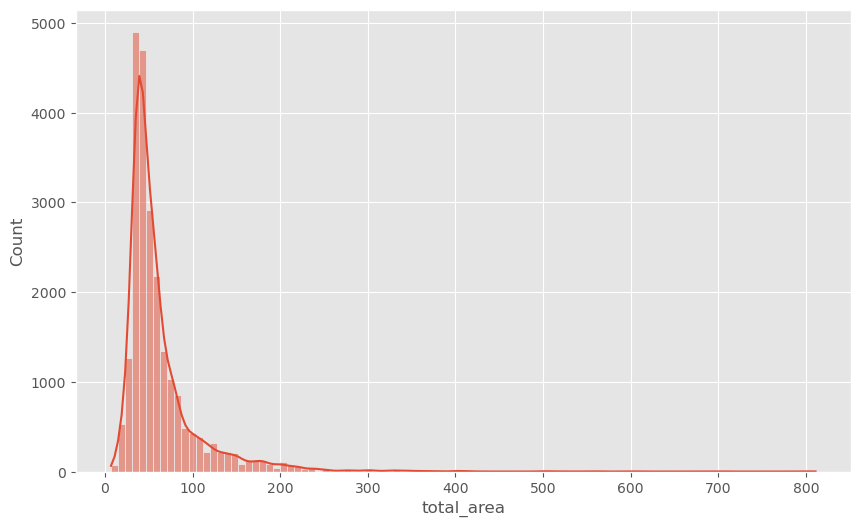

In [325]:
plt.figure(figsize=(10, 6))
sns.histplot(df0['total_area'], bins=100, kde=True) 

<Axes: xlabel='price'>

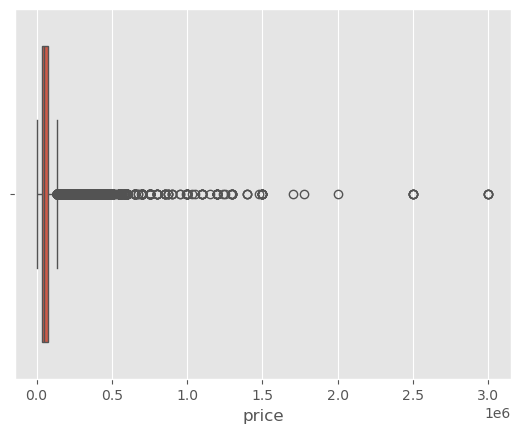

In [326]:
sns.boxplot(x=df0['price'])

In [327]:
df0.isna().sum()

ID  объявления                  0
Адрес                           0
Дом                             0
Парковка                    13417
Описание                        0
Ремонт                       2755
Площадь комнат, м2           8910
Балкон                       7978
Окна                         6613
Санузел                      2672
Можно с детьми/животными     6096
Дополнительно                 357
Название ЖК                 17520
Серия дома                  21205
Высота потолков, м          12162
Лифт                         5500
Мусоропровод                10522
price                           0
total_area                      0
metro                        2355
rooms                        1041
metro_min                    2355
dtype: int64

<Axes: xlabel='total_area'>

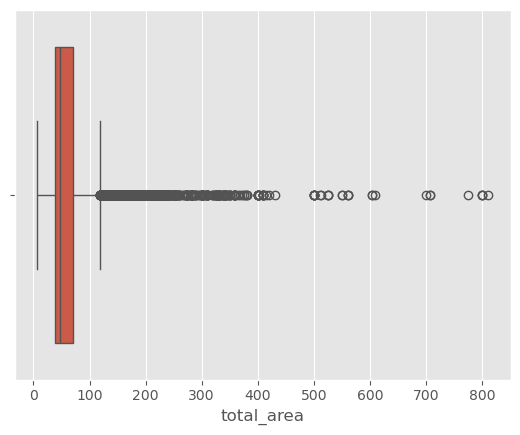

In [328]:
sns.boxplot(x=df0['total_area'])

<Axes: xlabel='price', ylabel='total_area'>

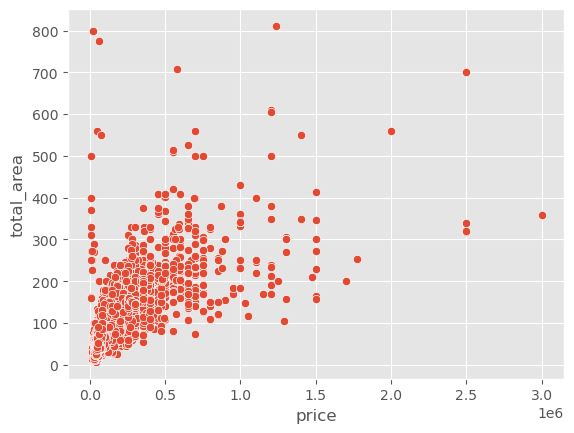

In [329]:
sns.scatterplot(data=df0, x='price', y='total_area')

<Axes: xlabel='price', ylabel='metro_min'>

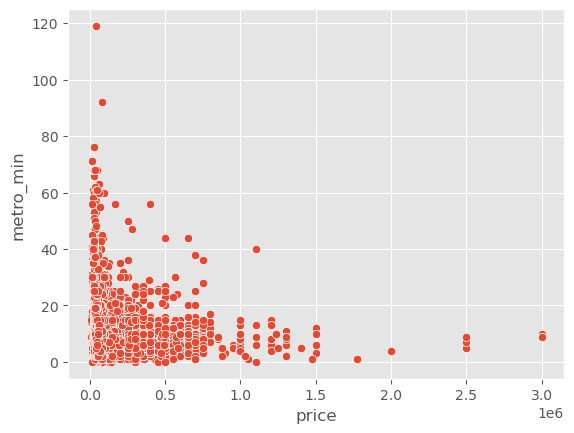

In [341]:
sns.scatterplot(data=df0, x='price', y='metro_min')

<Axes: xlabel='Ремонт', ylabel='price'>

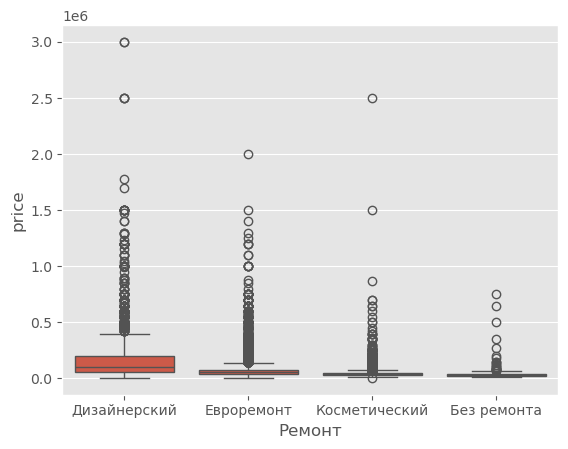

In [340]:
sns.boxplot(data=df0, x='Ремонт', y='price')

<Axes: xlabel='rooms', ylabel='price'>

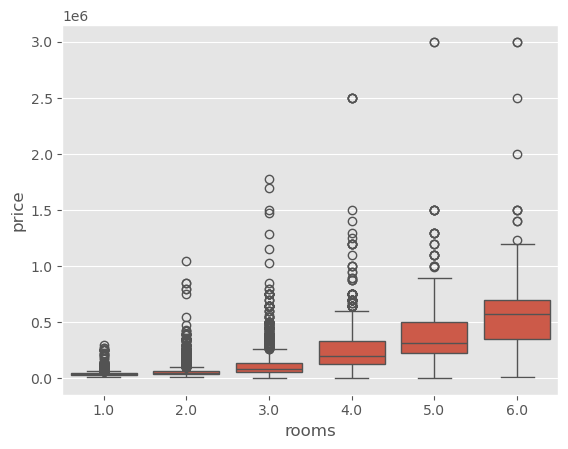

In [344]:
sns.boxplot(data=df0, x='rooms', y='price')

<Axes: xlabel='Парковка', ylabel='price'>

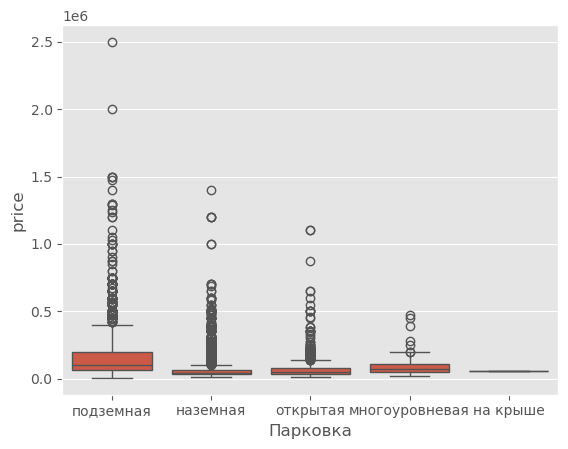

In [345]:
sns.boxplot(data=df0, x='Парковка', y='price')